In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# 1.) Define Enviornment

In [2]:
grid_size = 5
actions = ['up', 'down', 'left', 'right']
num_actions = len(actions)
agent_position = [0, 0]
goal_position = [4, 4]

# Rewards
rewards = {'goal': 1, 'other': -0.01}  # Minor negative reward to encourage exploration

# Initialize Q-table
Q_table = np.zeros((grid_size, grid_size, num_actions))

# Learning parameters
learning_rate = 0.1
discount_factor = 0.95
episodes = 1000
epsilon = 0.1  # Exploration rate

# 2.) Define Action Rewards

In [3]:

# Visualization setup
def plot_episode(steps, episode):
    clear_output(wait=True)
    plt.figure(figsize=(5, 5))
    plt.title(f"Episode: {episode}, Steps: {steps}")
    plt.xlim(-0.5, grid_size-0.5)
    plt.ylim(-0.5, grid_size-0.5)
    plt.grid()

    for i in range(grid_size):
        for j in range(grid_size):
            if [i, j] == agent_position:
                plt.text(j, grid_size-1-i, 'A', ha='center', va='center')
            elif [i, j] == goal_position:
                plt.text(j, grid_size-1-i, 'G', ha='center', va='center')
            else:
                plt.text(j, grid_size-1-i, '.', ha='center', va='center')

    plt.show()

def move_agent(agent_position, action_index):
    if actions[action_index] == 'up' and agent_position[0] > 0:
        agent_position[0] -= 1
    elif actions[action_index] == 'down' and agent_position[0] < grid_size - 1:
        agent_position[0] += 1
    elif actions[action_index] == 'left' and agent_position[1] > 0:
        agent_position[1] -= 1
    elif actions[action_index] == 'right' and agent_position[1] < grid_size - 1:
        agent_position[1] += 1
    return agent_position

def get_reward(agent_position):
    if agent_position == goal_position:
        return rewards['goal']
    else:
        return rewards['other']


# 3.) Implement Basic Q learning

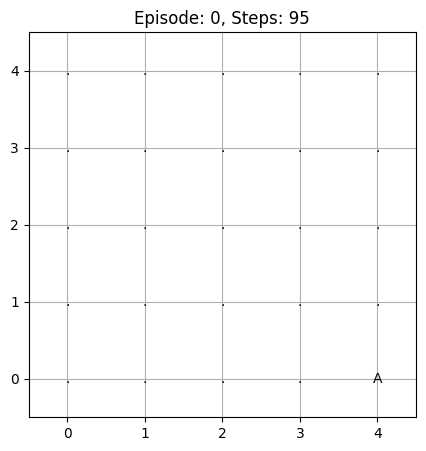

In [4]:

for episode in range(episodes):
    agent_position = [0, 0]  # Reset position at start of each episode
    steps = 0

    while agent_position != goal_position:
        steps += 1
        if np.random.rand() < epsilon:  # Explore
            action = np.random.randint(num_actions)
        else:  # Exploit
            action = np.argmax(Q_table[agent_position[0], agent_position[1], :])

        old_position = list(agent_position)
        new_position = move_agent(list(agent_position), action)
        reward = get_reward(new_position)

        # Update Q-table
        old_q_value = Q_table[old_position[0], old_position[1], action]
        future_q_value = np.max(Q_table[new_position[0], new_position[1], :])
        Q_table[old_position[0], old_position[1], action] = old_q_value + learning_rate * (reward + discount_factor * future_q_value - old_q_value)

        agent_position = new_position

        # Visualization every 100 episodes
        if episode % 100 == 0:
            plot_episode(steps, episode)
            time.sleep(0.1)  # Slow down the visualization

    if steps <= grid_size * 2:  # Early stop if it finds a reasonably good path
        break


In [5]:
Q_table

array([[[-0.00786139, -0.00858491, -0.00786139, -0.00853735],
        [-0.0059255 , -0.00645625, -0.00658338, -0.00551757],
        [-0.0039701 , -0.00388503, -0.00421068, -0.00386793],
        [-0.00298503, -0.003705  , -0.00306197, -0.002805  ],
        [-0.00298503, -0.002976  , -0.0030701 , -0.00388503]],

       [[-0.00656156, -0.00640887, -0.00685697, -0.00658753],
        [-0.00504263, -0.00554728, -0.0053185 , -0.00483311],
        [-0.00307822, -0.00460995, -0.00316329, -0.00386793],
        [-0.002976  , -0.00281403, -0.00308793, -0.0028905 ],
        [-0.00289953, -0.001988  , -0.002166  , -0.001995  ]],

       [[-0.00511299, -0.00549375, -0.00486398, -0.0049036 ],
        [-0.00404667, -0.00453215, -0.00422618, -0.00476386],
        [-0.00298588, -0.00345645, -0.00420126, -0.002976  ],
        [-0.001995  , -0.002805  , -0.002166  , -0.001995  ],
        [-0.001995  ,  0.01534   , -0.001095  , -0.001     ]],

       [[-0.00503139, -0.00387605, -0.0039701 , -0.00396924],
  

# 4.) Re-implement Basic Q learning

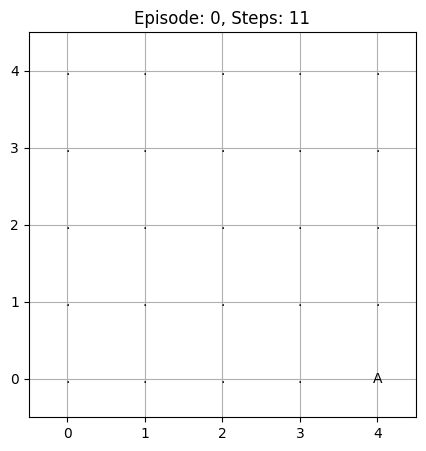

In [6]:
for episode in range(episodes):
    agent_position = [0, 0]  # Reset position at start of each episode
    steps = 0

    while agent_position != goal_position:
        steps += 1
        if np.random.rand() < epsilon:  # Explore
            action = np.random.randint(num_actions)
        else:  # Exploit
            action = np.argmax(Q_table[agent_position[0], agent_position[1], :])

        old_position = list(agent_position)
        new_position = move_agent(list(agent_position), action)
        reward = get_reward(new_position)

        # Update Q-table
        old_q_value = Q_table[old_position[0], old_position[1], action]
        future_q_value = np.max(Q_table[new_position[0], new_position[1], :])
        Q_table[old_position[0], old_position[1], action] = old_q_value + learning_rate * (reward + discount_factor * future_q_value - old_q_value)

        agent_position = new_position

        # Visualization every 100 episodes
        if episode % 100 == 0:
            plot_episode(steps, episode)
            time.sleep(0.1)  # Slow down the visualization

    if steps <= grid_size * 2:  # Early stop if it finds a reasonably good path
        break


In [7]:
Q_table

array([[[-0.01261706, -0.01202794, -0.01261706, -0.01247017],
        [-0.00882208, -0.00892304, -0.00904996, -0.00934067],
        [-0.00689587, -0.00739065, -0.00660479, -0.00715612],
        [-0.00495025, -0.0055091 , -0.00530363, -0.00471008],
        [-0.0039701 , -0.00386726, -0.00414025, -0.00388503]],

       [[-0.00891083, -0.00874429, -0.00878358, -0.00899308],
        [-0.0072341 , -0.0079924 , -0.00742041, -0.00726208],
        [-0.00623914, -0.00624274, -0.00550085, -0.00556697],
        [-0.00404009, -0.00401655, -0.00427274, -0.00372798],
        [-0.00289953,  0.00146364, -0.002166  , -0.001995  ]],

       [[-0.00630999, -0.0063126 , -0.00583966, -0.00670252],
        [-0.00627571, -0.00543908, -0.00532547, -0.00634153],
        [-0.0041384 , -0.00315366, -0.00420126, -0.00386793],
        [-0.0030701 , -0.002805  , -0.002166  ,  0.01143353],
        [-0.001995  ,  0.13138299, -0.001095  , -0.001     ]],

       [[-0.00503139, -0.0055784 , -0.00495025, -0.0048559 ],
  